# Кейc №3 - Задача регрессии 

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [3]:
df_vehicles = pd.read_csv('vehicles.csv')
df_vehicles

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,...,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,...,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,...,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,...,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458208,458208,7240959076,https://wausau.craigslist.org/ctd/d/wisconsin-...,wausau,https://wausau.craigslist.org,14995,2014.0,cadillac,srx,excellent,...,4wd,mid-size,SUV,silver,https://images.craigslist.org/00808_1bVcaYZtCy...,2014 Cadillac SRX All Wheel Drive Luxury Colle...,wi,44.408867,-89.881210,2020-12-03T08:56:29-0600
458209,458209,7240954682,https://wausau.craigslist.org/ctd/d/wisconsin-...,wausau,https://wausau.craigslist.org,17895,2018.0,hyundai,tucson,excellent,...,4wd,mid-size,SUV,white,https://images.craigslist.org/00l0l_gikkP11dEF...,2018 Hyundai Tucson SE 2.0 I4 AWD. Carfax ver...,wi,44.408867,-89.882240,2020-12-03T08:48:08-0600
458210,458210,7240645700,https://wyoming.craigslist.org/cto/d/sheridan-...,wyoming,https://wyoming.craigslist.org,17900,2014.0,cadillac,cts coupe awd,excellent,...,4wd,mid-size,coupe,black,https://images.craigslist.org/00t0t_lNnW4cboOG...,"53,000 miles. Cosmetically, in near mint condi...",wy,44.784900,-106.964800,2020-12-02T14:09:45-0700
458211,458211,7240600465,https://wyoming.craigslist.org/cto/d/sheridan-...,wyoming,https://wyoming.craigslist.org,1300,2008.0,jeep,grand cherokee,good,...,4wd,mid-size,SUV,white,https://images.craigslist.org/00C0C_fl0NW1IeJw...,PRICE REDUCTION Turns out the engine is toast...,wy,44.773500,-106.939600,2020-12-02T13:01:04-0700


In [871]:
df_vehicles['size']

KeyError: 'size'

In [5]:
df_vehicles.head()

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,...,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,...,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,...,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,...,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600


In [10]:
df_vehicles.sample(5)

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
446665,446665,7239623753,https://denver.craigslist.org/ctd/d/denver-201...,denver,https://denver.craigslist.org,15995,2018.0,toyota,corolla,NaN,...,fwd,NaN,sedan,blue,https://images.craigslist.org/00000_3hMUWWtzHh...,"2018 Toyota Corolla SE Sedan 4D -- $15,995 ...",co,39.851294,-104.978383,2020-11-30T18:01:58-0700
329465,329465,7240139114,https://portland.craigslist.org/mlt/ctd/d/port...,portland,https://portland.craigslist.org,37995,2019.0,toyota,4runner sr5,excellent,...,4wd,NaN,NaN,NaN,https://images.craigslist.org/00z0z_4RNlgAXl1W...,FUSION MOTORS IS OFFERING UP THIS SUPER CLEAN ...,or,45.616989,-122.693189,2020-12-01T14:54:09-0800
413893,413893,7233335414,https://kpr.craigslist.org/ctd/d/kennewick-201...,kennewick-pasco-richland,https://kpr.craigslist.org,0,2014.0,honda,cr-v,NaN,...,NaN,NaN,SUV,black,https://images.craigslist.org/00M0M_3GHVR5Rclt...,2014 Honda CR-V EX 4WD 5-Speed AT Offered ...,wa,46.222946,-119.191101,2020-11-18T16:13:17-0800
217386,217386,7235042276,https://stcloud.craigslist.org/cto/d/sartell-2...,st cloud,https://stcloud.craigslist.org,16800,2013.0,chevrolet,silverado 1500,good,...,4wd,full-size,pickup,blue,https://images.craigslist.org/00s0s_9xg7u6m3Dv...,Well taken care of 2013 Chevy Silverado 1500 4...,mn,45.652664,-94.186306,2020-11-21T19:53:08-0600
23126,23126,7234523036,https://bakersfield.craigslist.org/ctd/d/downe...,bakersfield,https://bakersfield.craigslist.org,25989,2012.0,jeep,wrangler unlimited sahara,NaN,...,4wd,NaN,SUV,red,https://images.craigslist.org/00q0q_5t1yGaEvPl...,2012 Jeep Wrangler Unlimited Sahara SUVExterio...,ca,33.943613,-118.139639,2020-11-20T19:18:25-0800


In [6]:
df_vehicles.tail()

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
458208,458208,7240959076,https://wausau.craigslist.org/ctd/d/wisconsin-...,wausau,https://wausau.craigslist.org,14995,2014.0,cadillac,srx,excellent,...,4wd,mid-size,SUV,silver,https://images.craigslist.org/00808_1bVcaYZtCy...,2014 Cadillac SRX All Wheel Drive Luxury Colle...,wi,44.408867,-89.881210,2020-12-03T08:56:29-0600
458209,458209,7240954682,https://wausau.craigslist.org/ctd/d/wisconsin-...,wausau,https://wausau.craigslist.org,17895,2018.0,hyundai,tucson,excellent,...,4wd,mid-size,SUV,white,https://images.craigslist.org/00l0l_gikkP11dEF...,2018 Hyundai Tucson SE 2.0 I4 AWD. Carfax ver...,wi,44.408867,-89.882240,2020-12-03T08:48:08-0600
458210,458210,7240645700,https://wyoming.craigslist.org/cto/d/sheridan-...,wyoming,https://wyoming.craigslist.org,17900,2014.0,cadillac,cts coupe awd,excellent,...,4wd,mid-size,coupe,black,https://images.craigslist.org/00t0t_lNnW4cboOG...,"53,000 miles. Cosmetically, in near mint condi...",wy,44.784900,-106.964800,2020-12-02T14:09:45-0700
458211,458211,7240600465,https://wyoming.craigslist.org/cto/d/sheridan-...,wyoming,https://wyoming.craigslist.org,1300,2008.0,jeep,grand cherokee,good,...,4wd,mid-size,SUV,white,https://images.craigslist.org/00C0C_fl0NW1IeJw...,PRICE REDUCTION Turns out the engine is toast...,wy,44.773500,-106.939600,2020-12-02T13:01:04-0700
458212,458212,7240562359,https://wyoming.craigslist.org/ctd/d/gilberts-...,wyoming,https://wyoming.craigslist.org,22900,2008.0,NaN,International 4300,NaN,...,NaN,NaN,NaN,NaN,https://images.craigslist.org/00k0k_77qSSp6sQC...,*** SHIPPING AVAILABLE DIRECTLY TO YOU. CALL F...,wy,42.117656,-88.436954,2020-12-02T12:03:45-0700


In [7]:
df_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458213 entries, 0 to 458212
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    458213 non-null  int64  
 1   id            458213 non-null  int64  
 2   url           458213 non-null  object 
 3   region        458213 non-null  object 
 4   region_url    458213 non-null  object 
 5   price         458213 non-null  int64  
 6   year          457163 non-null  float64
 7   manufacturer  439993 non-null  object 
 8   model         453367 non-null  object 
 9   condition     265273 non-null  object 
 10  cylinders     287073 non-null  object 
 11  fuel          454976 non-null  object 
 12  odometer      402910 non-null  float64
 13  title_status  455636 non-null  object 
 14  transmission  455771 non-null  object 
 15  VIN           270664 non-null  object 
 16  drive         324025 non-null  object 
 17  size          136865 non-null  object 
 18  type

In [8]:
df_vehicles.describe()

,Unnamed: 0,id,price,year,odometer,lat,long
count,458213.000000,4.582130e+05,4.582130e+05,457163.000000,4.029100e+05,450765.000000,450765.000000
mean,229106.000000,7.235233e+09,4.042093e+04,2010.746067,1.016698e+05,38.531925,-94.375824
std,132274.843786,4.594362e+06,8.194599e+06,8.868136,3.228623e+06,5.857378,18.076225
min,0.000000,7.208550e+09,0.000000e+00,1900.000000,0.000000e+00,-82.607549,-164.091797
25%,114553.000000,7.231953e+09,4.900000e+03,2008.000000,4.087700e+04,34.600000,-110.890427
50%,229106.000000,7.236409e+09,1.099500e+04,2013.000000,8.764100e+04,39.244500,-88.314889
75%,343659.000000,7.239321e+09,2.149500e+04,2016.000000,1.340000e+05,42.484503,-81.015022
max,458212.000000,7.241019e+09,3.615215e+09,2021.000000,2.043756e+09,82.049255,150.898969


In [ ]:
df_vehicles = df_vehicles.drop('Unnamed: 0', axis=1)

In [13]:
df_vehicles

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,...,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,4 cylinders,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,...,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,4 cylinders,...,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,...,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458208,7240959076,https://wausau.craigslist.org/ctd/d/wisconsin-...,wausau,https://wausau.craigslist.org,14995,2014.0,cadillac,srx,excellent,6 cylinders,...,4wd,mid-size,SUV,silver,https://images.craigslist.org/00808_1bVcaYZtCy...,2014 Cadillac SRX All Wheel Drive Luxury Colle...,wi,44.408867,-89.881210,2020-12-03T08:56:29-0600
458209,7240954682,https://wausau.craigslist.org/ctd/d/wisconsin-...,wausau,https://wausau.craigslist.org,17895,2018.0,hyundai,tucson,excellent,4 cylinders,...,4wd,mid-size,SUV,white,https://images.craigslist.org/00l0l_gikkP11dEF...,2018 Hyundai Tucson SE 2.0 I4 AWD. Carfax ver...,wi,44.408867,-89.882240,2020-12-03T08:48:08-0600
458210,7240645700,https://wyoming.craigslist.org/cto/d/sheridan-...,wyoming,https://wyoming.craigslist.org,17900,2014.0,cadillac,cts coupe awd,excellent,6 cylinders,...,4wd,mid-size,coupe,black,https://images.craigslist.org/00t0t_lNnW4cboOG...,"53,000 miles. Cosmetically, in near mint condi...",wy,44.784900,-106.964800,2020-12-02T14:09:45-0700
458211,7240600465,https://wyoming.craigslist.org/cto/d/sheridan-...,wyoming,https://wyoming.craigslist.org,1300,2008.0,jeep,grand cherokee,good,8 cylinders,...,4wd,mid-size,SUV,white,https://images.craigslist.org/00C0C_fl0NW1IeJw...,PRICE REDUCTION Turns out the engine is toast...,wy,44.773500,-106.939600,2020-12-02T13:01:04-0700


In [14]:
df_vehicles.nunique(axis = 0)

id              458213
url             458213
region             405
region_url         413
price            16924
year               110
manufacturer        43
model            31520
condition            6
cylinders            8
fuel                 5
odometer        108135
title_status         6
transmission         3
VIN             133620
drive                3
size                 4
type                13
paint_color         12
image_url       285404
description     384347
state               51
lat              61179
long             61559
posting_date    423805
dtype: int64

In [78]:
df_model = pd.DataFrame (df_vehicles['model'].unique())
df_model

,0
0,corvette grand sport
1,sonata
2,x3 3.0i
3,c-10
4,f350 lariat
...,...
31516,sportage lx 4wd
31517,f-150 xlt supercrew cab
31518,32' 2 car trailer
31519,bluebird 4300


In [15]:
df_vehicles = df_vehicles.drop('id', axis=1)
df_vehicles

,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,...,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,4 cylinders,gas,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,...,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,...,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,...,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458208,https://wausau.craigslist.org/ctd/d/wisconsin-...,wausau,https://wausau.craigslist.org,14995,2014.0,cadillac,srx,excellent,6 cylinders,gas,...,4wd,mid-size,SUV,silver,https://images.craigslist.org/00808_1bVcaYZtCy...,2014 Cadillac SRX All Wheel Drive Luxury Colle...,wi,44.408867,-89.881210,2020-12-03T08:56:29-0600
458209,https://wausau.craigslist.org/ctd/d/wisconsin-...,wausau,https://wausau.craigslist.org,17895,2018.0,hyundai,tucson,excellent,4 cylinders,gas,...,4wd,mid-size,SUV,white,https://images.craigslist.org/00l0l_gikkP11dEF...,2018 Hyundai Tucson SE 2.0 I4 AWD. Carfax ver...,wi,44.408867,-89.882240,2020-12-03T08:48:08-0600
458210,https://wyoming.craigslist.org/cto/d/sheridan-...,wyoming,https://wyoming.craigslist.org,17900,2014.0,cadillac,cts coupe awd,excellent,6 cylinders,gas,...,4wd,mid-size,coupe,black,https://images.craigslist.org/00t0t_lNnW4cboOG...,"53,000 miles. Cosmetically, in near mint condi...",wy,44.784900,-106.964800,2020-12-02T14:09:45-0700
458211,https://wyoming.craigslist.org/cto/d/sheridan-...,wyoming,https://wyoming.craigslist.org,1300,2008.0,jeep,grand cherokee,good,8 cylinders,gas,...,4wd,mid-size,SUV,white,https://images.craigslist.org/00C0C_fl0NW1IeJw...,PRICE REDUCTION Turns out the engine is toast...,wy,44.773500,-106.939600,2020-12-02T13:01:04-0700


In [19]:
df_vehicles['url'].loc[1]

'https://auburn.craigslist.org/cto/d/auburn-2014-hyundai-sonata-20t/7240309422.html'

In [20]:
df_vehicles['url'].loc[1000]

'https://bham.craigslist.org/ctd/d/gadsden-2018-chevrolet-silverado-1500/7234032650.html'

In [21]:
df_vehicles['url'].loc[15000]

'https://tucson.craigslist.org/ctd/d/tucson-2007-ford-expedition-4wd-4dr/7239343169.html'

In [22]:
df_vehicles['url'].loc[458212]

'https://wyoming.craigslist.org/ctd/d/gilberts-international-4300-altec/7240562359.html'

In [25]:
df_vehicles['manufacturer'].value_counts()

ford               79666
chevrolet          64977
toyota             38577
honda              25868
nissan             23654
jeep               21165
ram                17697
gmc                17267
dodge              16730
bmw                12352
hyundai            10975
mercedes-benz      10628
subaru             10510
volkswagen         10489
kia                 8854
chrysler            7499
lexus               7119
cadillac            6743
buick               6009
mazda               5931
audi                5583
acura               4008
infiniti            3714
lincoln             3338
pontiac             3037
volvo               2866
mini                2330
mitsubishi          2301
porsche             1779
rover               1662
mercury             1645
saturn              1393
tesla               1067
jaguar              1060
fiat                 955
alfa-romeo           187
harley-davidson      139
ferrari               96
datsun                63
aston-martin          35


# Обработка пустых строок

In [706]:
df_vehicles_unknown_check = df_vehicles.copy()

In [715]:
df_vehicles_unknown_check = df_vehicles_unknown_check.replace(np.nan, 'unknown')

In [47]:
df_vehicles_unknown_check

,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,...,rwd,unknown,other,unknown,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.59,-85.48,2020-12-02T08:11:30-0600
1,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,4 cylinders,gas,...,fwd,unknown,sedan,unknown,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.5475,-85.4682,2020-12-02T02:11:50-0600
2,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,...,unknown,unknown,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,...,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.8616,-85.2161,2020-12-01T15:54:45-0600
4,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,...,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.5475,-85.4682,2020-12-01T12:53:56-0600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458208,https://wausau.craigslist.org/ctd/d/wisconsin-...,wausau,https://wausau.craigslist.org,14995,2014.0,cadillac,srx,excellent,6 cylinders,gas,...,4wd,mid-size,SUV,silver,https://images.craigslist.org/00808_1bVcaYZtCy...,2014 Cadillac SRX All Wheel Drive Luxury Colle...,wi,44.408867,-89.88121,2020-12-03T08:56:29-0600
458209,https://wausau.craigslist.org/ctd/d/wisconsin-...,wausau,https://wausau.craigslist.org,17895,2018.0,hyundai,tucson,excellent,4 cylinders,gas,...,4wd,mid-size,SUV,white,https://images.craigslist.org/00l0l_gikkP11dEF...,2018 Hyundai Tucson SE 2.0 I4 AWD. Carfax ver...,wi,44.408867,-89.88224,2020-12-03T08:48:08-0600
458210,https://wyoming.craigslist.org/cto/d/sheridan-...,wyoming,https://wyoming.craigslist.org,17900,2014.0,cadillac,cts coupe awd,excellent,6 cylinders,gas,...,4wd,mid-size,coupe,black,https://images.craigslist.org/00t0t_lNnW4cboOG...,"53,000 miles. Cosmetically, in near mint condi...",wy,44.7849,-106.9648,2020-12-02T14:09:45-0700
458211,https://wyoming.craigslist.org/cto/d/sheridan-...,wyoming,https://wyoming.craigslist.org,1300,2008.0,jeep,grand cherokee,good,8 cylinders,gas,...,4wd,mid-size,SUV,white,https://images.craigslist.org/00C0C_fl0NW1IeJw...,PRICE REDUCTION Turns out the engine is toast...,wy,44.7735,-106.9396,2020-12-02T13:01:04-0700


In [35]:
df_vehicles_unknown_check[].value_counts()

0         chevrolet
1           hyundai
2               bmw
3         chevrolet
4              ford
            ...    
458208     cadillac
458209      hyundai
458210     cadillac
458211         jeep
458212      unknown
Name: manufacturer, Length: 458213, dtype: object

# Вытаскиваем произврдителя

In [48]:
df_manufacturer_unknown = df_vehicles_unknown_check.loc[df_vehicles_unknown_check['manufacturer'] == 'unknown']
df_manufacturer_unknown

,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
15,https://auburn.craigslist.org/ctd/d/royal-palm...,auburn,https://auburn.craigslist.org,38500,unknown,unknown,500,unknown,8 cylinders,gas,...,rwd,unknown,pickup,white,https://images.craigslist.org/00Y0Y_65ISqDroMw...,2019 *Ram* *1500* Big Horn/Lone Star 4x2 Crew ...,al,26.703851,-80.081996,2020-11-25T11:52:03-0600
21,https://auburn.craigslist.org/cto/d/alexander-...,auburn,https://auburn.craigslist.org,6500,2010.0,unknown,bmw328xi,excellent,6 cylinders,gas,...,fwd,unknown,sedan,black,https://images.craigslist.org/00h0h_9S2sR93fqX...,"Clean vehicle, no mechanical issues; runs and ...",al,32.951775,-85.94718,2020-11-23T13:20:10-0600
78,https://auburn.craigslist.org/ctd/d/sacramento...,auburn,https://auburn.craigslist.org,9998,2016.0,unknown,Scion iA,excellent,unknown,gas,...,fwd,unknown,sedan,white,https://images.craigslist.org/00J0J_3wapfWY6j7...,2016 *** Scion iA Base 4dr Sedan 6A Sedan *** ...,al,38.641098,-121.428624,2020-11-05T13:48:30-0600
88,https://bham.craigslist.org/ctd/d/jonesboro-fo...,birmingham,https://bham.craigslist.org,11937,1999.0,unknown,FordE250,unknown,unknown,gas,...,unknown,unknown,unknown,unknown,https://images.craigslist.org/00I0I_axUqoDveYb...,FORD E250 WHEELCHAIR VAN TRANSFER SEAT 53K MIL...,al,33.5242,-84.359,2020-12-02T13:55:12-0600
137,https://bham.craigslist.org/ctd/d/south-amboy-...,birmingham,https://bham.craigslist.org,55990,2014.0,unknown,Hino 338,good,6 cylinders,diesel,...,rwd,unknown,unknown,white,https://images.craigslist.org/00H0H_fIf5ddcH9S...,"2014 Hino 338 22' ROLL BACK, TOW TRUCK 106K, *...",al,40.468826,-74.281734,2020-12-01T17:19:52-0600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458148,https://milwaukee.craigslist.org/cto/d/hartlan...,milwaukee,https://milwaukee.craigslist.org,3500,2001.0,unknown,32' 2 car trailer,good,unknown,other,...,unknown,full-size,other,black,https://images.craigslist.org/01111_bUHearf4tI...,32' 2 Car Hauler Trailer with electric brakes ...,wi,43.1172,-88.3446,2020-12-03T09:54:49-0600
458158,https://milwaukee.craigslist.org/ctd/d/milwauk...,milwaukee,https://milwaukee.craigslist.org,10590,2015.0,unknown,smart fortwo Pure Hatchback,good,unknown,gas,...,rwd,unknown,coupe,white,https://images.craigslist.org/00V0V_4EfF1I6ldw...,Carvana is the safer way to buy a car During t...,wi,43.06,-87.96,2020-12-03T09:01:58-0600
458162,https://milwaukee.craigslist.org/cto/d/lannon-...,milwaukee,https://milwaukee.craigslist.org,46000,2009.0,unknown,3200,excellent,unknown,diesel,...,unknown,full-size,bus,white,https://images.craigslist.org/00S0S_9JT14ZiSgQ...,2009 International bus with 36 seats four whee...,wi,43.1497,-88.1639,2020-12-03T08:43:58-0600
458163,https://milwaukee.craigslist.org/cto/d/lannon-...,milwaukee,https://milwaukee.craigslist.org,6000,2000.0,unknown,bluebird 4300,good,6 cylinders,diesel,...,unknown,full-size,bus,custom,https://images.craigslist.org/00d0d_86VFKcSW8L...,Beautiful 40 passenger bus with low millage. ...,wi,43.1497,-88.1639,2020-12-03T08:38:26-0600


In [49]:
df_manufacturer_unknown['url'].loc[458158]

'https://milwaukee.craigslist.org/ctd/d/milwaukee-2015-smart-fortwo-pure/7240962098.html'

In [62]:
df_manufacturer_unknown.loc[458158]

url             https://milwaukee.craigslist.org/ctd/d/milwauk...
region                                                  milwaukee
region_url                       https://milwaukee.craigslist.org
price                                                       10590
year                                                       2015.0
manufacturer                                              unknown
model                                 smart fortwo Pure Hatchback
condition                                                    good
cylinders                                                 unknown
fuel                                                          gas
odometer                                                  28842.0
title_status                                                clean
transmission                                            automatic
VIN                                             WMEEJ3BA7FK810993
drive                                                         rwd
size      

In [50]:
df_manufacturer_unknown['url'].loc[458163]

'https://milwaukee.craigslist.org/cto/d/lannon-2000-bluebird-bus/7240949578.html'

In [471]:
df_manufacturer_unknown['model'].loc[458163]

'bluebird 4300'

In [473]:
df_manufacturer_unknown.loc[458163]

url             https://milwaukee.craigslist.org/cto/d/lannon-...
region                                                  milwaukee
region_url                       https://milwaukee.craigslist.org
price                                                        6000
year                                                       2000.0
manufacturer                                              unknown
model                                               bluebird 4300
condition                                                    good
cylinders                                             6 cylinders
fuel                                                       diesel
odometer                                                  95000.0
title_status                                                clean
transmission                                            automatic
VIN                                                       unknown
drive                                                     unknown
size      

In [51]:
df_manufacturer_unknown['url'].loc[78]

'https://auburn.craigslist.org/ctd/d/sacramento-2016-scion-ia-base-4dr-sedan/7226011362.html'

In [61]:
df_manufacturer_unknown.loc[78]

url             https://auburn.craigslist.org/ctd/d/sacramento...
region                                                     auburn
region_url                          https://auburn.craigslist.org
price                                                        9998
year                                                       2016.0
manufacturer                                              unknown
model                                                    Scion iA
condition                                               excellent
cylinders                                                 unknown
fuel                                                          gas
odometer                                                  81511.0
title_status                                                clean
transmission                                            automatic
VIN                                             3MYDLBZV9GY102496
drive                                                         fwd
size      

In [57]:
df_manufacturer_unknown['url'].loc[51027]

'https://sacramento.craigslist.org/ctd/d/bakersfield-2013-freightliner-m2-reefer/7240555793.html'

In [59]:
df_manufacturer_unknown.loc[51027]

url             https://sacramento.craigslist.org/ctd/d/bakers...
region                                                 sacramento
region_url                      https://sacramento.craigslist.org
price                                                       32900
year                                                       2013.0
manufacturer                                              unknown
model                                             FREIGHTLINER M2
condition                                                    good
cylinders                                                 unknown
fuel                                                       diesel
odometer                                                 200000.0
title_status                                                clean
transmission                                               manual
VIN                                                       unknown
drive                                                     unknown
size      

In [472]:
df_manufacturer_unknown['url'].loc[257396]

'https://jerseyshore.craigslist.org/ctd/d/south-amboy-2012-hino-258-side-puller/7234997826.html'

In [63]:
df_manufacturer_unknown.loc[257396]

url             https://jerseyshore.craigslist.org/ctd/d/south...
region                                               jersey shore
region_url                     https://jerseyshore.craigslist.org
price                                                       51990
year                                                       2012.0
manufacturer                                              unknown
model                                                    Hino 258
condition                                                    good
cylinders                                             6 cylinders
fuel                                                       diesel
odometer                                                 127816.0
title_status                                                clean
transmission                                            automatic
VIN                                             5PVNE8JN8C4S50213
drive                                                         rwd
size      

In [493]:
df_manufacturer_unknown['model']

15                                500
21                           bmw328xi
78                           Scion iA
88                           FordE250
137                          Hino 338
                     ...             
458148              32' 2 car trailer
458158    smart fortwo Pure Hatchback
458162                           3200
458163                  bluebird 4300
458212             International 4300
Name: model, Length: 18220, dtype: object

In [813]:
df_manufacturer_unknown['model_manuf'] = df_manufacturer_unknown['model'].str.findall('^(\w+)\D').transform(''.join)
df_manufacturer_unknown

/var/folders/q4/p89x159x6hs05djns8vkm4600000gn/T/ipykernel_11080/1796823678.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_manufacturer_unknown['model_manuf'] = df_manufacturer_unknown['model'].str.findall('^(\w+)\D').transform(''.join)


,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,...,size,type,paint_color,image_url,description,state,lat,long,posting_date,model_manuf
15,https://auburn.craigslist.org/ctd/d/royal-palm...,auburn,https://auburn.craigslist.org,38500,unknown,unknown,500,unknown,8 cylinders,gas,...,unknown,pickup,white,https://images.craigslist.org/00Y0Y_65ISqDroMw...,2019 *Ram* *1500* Big Horn/Lone Star 4x2 Crew ...,al,26.703851,-80.081996,2020-11-25T11:52:03-0600,
21,https://auburn.craigslist.org/cto/d/alexander-...,auburn,https://auburn.craigslist.org,6500,2010.0,unknown,bmw328xi,excellent,6 cylinders,gas,...,unknown,sedan,black,https://images.craigslist.org/00h0h_9S2sR93fqX...,"Clean vehicle, no mechanical issues; runs and ...",al,32.951775,-85.94718,2020-11-23T13:20:10-0600,bmw328x
78,https://auburn.craigslist.org/ctd/d/sacramento...,auburn,https://auburn.craigslist.org,9998,2016.0,unknown,Scion iA,excellent,unknown,gas,...,unknown,sedan,white,https://images.craigslist.org/00J0J_3wapfWY6j7...,2016 *** Scion iA Base 4dr Sedan 6A Sedan *** ...,al,38.641098,-121.428624,2020-11-05T13:48:30-0600,Scion
88,https://bham.craigslist.org/ctd/d/jonesboro-fo...,birmingham,https://bham.craigslist.org,11937,1999.0,unknown,FordE250,unknown,unknown,gas,...,unknown,unknown,unknown,https://images.craigslist.org/00I0I_axUqoDveYb...,FORD E250 WHEELCHAIR VAN TRANSFER SEAT 53K MIL...,al,33.5242,-84.359,2020-12-02T13:55:12-0600,Ford
137,https://bham.craigslist.org/ctd/d/south-amboy-...,birmingham,https://bham.craigslist.org,55990,2014.0,unknown,Hino 338,good,6 cylinders,diesel,...,unknown,unknown,white,https://images.craigslist.org/00H0H_fIf5ddcH9S...,"2014 Hino 338 22' ROLL BACK, TOW TRUCK 106K, *...",al,40.468826,-74.281734,2020-12-01T17:19:52-0600,Hino
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458148,https://milwaukee.craigslist.org/cto/d/hartlan...,milwaukee,https://milwaukee.craigslist.org,3500,2001.0,unknown,32' 2 car trailer,good,unknown,other,...,full-size,other,black,https://images.craigslist.org/01111_bUHearf4tI...,32' 2 Car Hauler Trailer with electric brakes ...,wi,43.1172,-88.3446,2020-12-03T09:54:49-0600,32
458158,https://milwaukee.craigslist.org/ctd/d/milwauk...,milwaukee,https://milwaukee.craigslist.org,10590,2015.0,unknown,smart fortwo Pure Hatchback,good,unknown,gas,...,unknown,coupe,white,https://images.craigslist.org/00V0V_4EfF1I6ldw...,Carvana is the safer way to buy a car During t...,wi,43.06,-87.96,2020-12-03T09:01:58-0600,smart
458162,https://milwaukee.craigslist.org/cto/d/lannon-...,milwaukee,https://milwaukee.craigslist.org,46000,2009.0,unknown,3200,excellent,unknown,diesel,...,full-size,bus,white,https://images.craigslist.org/00S0S_9JT14ZiSgQ...,2009 International bus with 36 seats four whee...,wi,43.1497,-88.1639,2020-12-03T08:43:58-0600,
458163,https://milwaukee.craigslist.org/cto/d/lannon-...,milwaukee,https://milwaukee.craigslist.org,6000,2000.0,unknown,bluebird 4300,good,6 cylinders,diesel,...,full-size,bus,custom,https://images.craigslist.org/00d0d_86VFKcSW8L...,Beautiful 40 passenger bus with low millage. ...,wi,43.1497,-88.1639,2020-12-03T08:38:26-0600,bluebird


In [772]:
df_manufacturer_unknown['model_manuf'].unique()

array(['', 'bmw', 'Scion iA', ..., "Isuzu P'up Diesel", 'GO', 'bluebird '],
      dtype=object)

In [814]:
df_manufacturer_unknown.model_manuf.to_csv('df_manufacturer_unknown2.csv', sep = ',')

# Вытаскиваем состояние АТС

In [523]:
df_condition_unknown = df_vehicles_unknown_check.loc[df_vehicles_unknown_check['condition'] == 'unknown']
df_condition_unknown

,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
13,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,5995,2010.0,hyundai,tucson,unknown,unknown,gas,...,unknown,unknown,unknown,unknown,https://images.craigslist.org/00O0O_hmpZECNGvn...,2010 Tucson AWD with 126k miles. Vehicle has ...,al,32.623299,-85.481787,2020-11-26T10:57:06-0600
15,https://auburn.craigslist.org/ctd/d/royal-palm...,auburn,https://auburn.craigslist.org,38500,unknown,unknown,500,unknown,8 cylinders,gas,...,rwd,unknown,pickup,white,https://images.craigslist.org/00Y0Y_65ISqDroMw...,2019 *Ram* *1500* Big Horn/Lone Star 4x2 Crew ...,al,26.703851,-80.081996,2020-11-25T11:52:03-0600
20,https://auburn.craigslist.org/cto/d/salem-lari...,auburn,https://auburn.craigslist.org,4500,2003.0,ford,f-150,unknown,unknown,gas,...,unknown,unknown,unknown,unknown,https://images.craigslist.org/00606_bW4SoRpyFr...,221K MI GOOD LOOKING GOOD RUNNING SEE PIC THEN...,al,32.6212,-85.184,2020-11-23T14:58:22-0600
25,https://auburn.craigslist.org/ctd/d/roanoke-20...,auburn,https://auburn.craigslist.org,0,2016.0,chevrolet,silverado 1500 lt z71,unknown,8 cylinders,other,...,4wd,unknown,truck,white,https://images.craigslist.org/00303_52u3kXd2Iq...,ROGER BELL AUTO BROKERS At Roger Bell Auto Br...,al,33.1512,-85.3722,2020-11-21T09:52:03-0600
42,https://auburn.craigslist.org/ctd/d/ton-servic...,auburn,https://auburn.craigslist.org,0,2014.0,ram,unknown,unknown,unknown,diesel,...,unknown,unknown,other,white,https://images.craigslist.org/00303_eLTsWH0uS8...,"All Trucks USA12106 Old River RdRockton, IL 61...",al,unknown,unknown,2020-11-17T14:55:59-0600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458197,https://sheboygan.craigslist.org/ctd/d/sheboyg...,sheboygan,https://sheboygan.craigslist.org,16699,2016.0,ford,escape,unknown,unknown,gas,...,unknown,unknown,unknown,unknown,https://images.craigslist.org/00v0v_7Nzb9PWCdJ...,Dave Specht Motor Co. address: 295 N. Main ...,wi,43.739538,-87.819097,2020-12-03T08:30:02-0600
458198,https://sheboygan.craigslist.org/ctd/d/random-...,sheboygan,https://sheboygan.craigslist.org,10995,1993.0,gmc,yukon,unknown,unknown,gas,...,4wd,unknown,unknown,blue,https://images.craigslist.org/00f0f_f49YVn8KK2...,Mueller's Sales & Service address: N7277 Hw...,wi,43.54211,-87.942165,2020-12-03T08:27:47-0600
458205,https://wausau.craigslist.org/ctd/d/eau-claire...,wausau,https://wausau.craigslist.org,20950,2015.0,jeep,grand cherokee overland 4x4,unknown,unknown,gas,...,unknown,unknown,unknown,unknown,https://images.craigslist.org/00606_inlZnX05CG...,2015 Jeep Grand Cherokee Overland 4x4 ✔ We TA...,wi,44.843195,-91.550371,2020-12-03T09:15:05-0600
458207,https://wausau.craigslist.org/ctd/d/eau-claire...,wausau,https://wausau.craigslist.org,19950,2017.0,audi,a4 premium plus quattro awd,unknown,unknown,gas,...,unknown,unknown,unknown,unknown,https://images.craigslist.org/00o0o_elNZEbATqG...,2017 Audi A4 Premium Plus Quattro AWD ✔ We TA...,wi,44.843195,-91.550371,2020-12-03T09:06:21-0600


In [69]:
df_vehicles_unknown_check['condition'].unique()

array(['good', 'excellent', 'unknown', 'like new', 'fair', 'salvage',
       'new'], dtype=object)

In [ ]:
df_vehicles_unknown_check['condition'].unique()

In [526]:
df_vehicles_unknown_check['condition'].value_counts()

unknown      192940
good         115685
excellent    115206
like new      24553
fair           7740
new            1428
salvage         661
Name: condition, dtype: int64

In [519]:
df_vehicles_unknown_check['title_status'].unique()

array(['clean', 'lien', 'missing', 'salvage', 'rebuilt', 'unknown',
       'parts only'], dtype=object)

In [524]:
df_vehicles_unknown_check['title_status'].value_counts()

clean         439626
rebuilt         8698
salvage         4233
unknown         2577
lien            2091
missing          794
parts only       194
Name: title_status, dtype: int64

In [533]:
df_vehicles_unknown_check.loc[df_vehicles_unknown_check['title_status'] == 'missing']

,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
25,https://auburn.craigslist.org/ctd/d/roanoke-20...,auburn,https://auburn.craigslist.org,0,2016.0,chevrolet,silverado 1500 lt z71,unknown,8 cylinders,other,...,4wd,unknown,truck,white,https://images.craigslist.org/00303_52u3kXd2Iq...,ROGER BELL AUTO BROKERS At Roger Bell Auto Br...,al,33.1512,-85.3722,2020-11-21T09:52:03-0600
102,https://bham.craigslist.org/cto/d/montevallo-1...,birmingham,https://bham.craigslist.org,4,1961.0,ford,falcon,unknown,unknown,gas,...,unknown,unknown,unknown,unknown,https://images.craigslist.org/00x0x_fUZyUaNxj2...,I have up for sale a 1961 Ford faclcon 4door. ...,al,33.1248,-86.8622,2020-12-02T10:48:54-0600
167,https://bham.craigslist.org/cto/d/sylacauga-19...,birmingham,https://bham.craigslist.org,800,1976.0,chevrolet,nova,unknown,6 cylinders,gas,...,rwd,full-size,sedan,yellow,https://images.craigslist.org/00j0j_79KZ6D7PJK...,1976 Chevrolet Nova 250 six cylinder automatic...,al,33.1717,-86.2713,2020-12-01T15:42:05-0600
1091,https://bham.craigslist.org/cto/d/birmingham-1...,birmingham,https://bham.craigslist.org,3950,1941.0,dodge,brothers,good,6 cylinders,gas,...,rwd,full-size,sedan,green,https://images.craigslist.org/00S0S_kuqqDw5KWw...,1941 Dodge D19 Luxury Liner 2 Door Deluxe Seda...,al,33.4328,-86.6225,2020-11-19T09:06:29-0600
1274,https://bham.craigslist.org/cto/d/adamsville-1...,birmingham,https://bham.craigslist.org,250,1981.0,ford,courier,unknown,4 cylinders,gas,...,unknown,unknown,unknown,red,https://images.craigslist.org/01010_6u2BZvFJIj...,"1981 Ford Courier. Rebuilt engine, 4-speed man...",al,33.5884,-86.9597,2020-11-16T17:57:59-0600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454087,https://newyork.craigslist.org/mnh/ctd/d/water...,new york city,https://newyork.craigslist.org,10999,1987.0,chevrolet,corvette,excellent,8 cylinders,gas,...,unknown,unknown,unknown,unknown,https://images.craigslist.org/00T0T_22jemq1yrN...,1987 Chevrolet Corvette Convertible $10999.00 ...,ny,41.5754,-73.0318,2020-12-03T07:44:25-0500
454456,https://nh.craigslist.org/cto/d/bedford-mazda-...,new hampshire,https://nh.craigslist.org,350,2001.0,mazda,protege5,fair,4 cylinders,gas,...,fwd,compact,hatchback,silver,https://images.craigslist.org/00Q0Q_6lXoqaf9so...,"2001 Mazda Protégé, being sold for parts. Ha...",nh,42.9403,-71.5213,2020-12-02T18:59:44-0500
456526,https://austin.craigslist.org/ctd/d/marble-fal...,austin,https://austin.craigslist.org,750,1980.0,unknown,FUEL STORAGE,unknown,unknown,diesel,...,unknown,unknown,unknown,black,https://images.craigslist.org/00V0V_98yjJfO2Hx...,(2) 500 Gallon Concrete Fuel Tanks- $750.00 EA...,tx,30.5784,-98.2751,2020-12-03T07:37:17-0600
457403,https://vermont.craigslist.org/cto/d/florence-...,vermont,https://vermont.craigslist.org,3000,2004.0,ram,1500,fair,8 cylinders,gas,...,4wd,full-size,pickup,red,https://images.craigslist.org/00n0n_5obZQrfH4v...,Up for sale is my 2004 Dodge Ram 1500 Sport. 5...,vt,43.6992,-73.0266,2020-12-03T10:12:42-0500


In [534]:
df_vehicles_unknown_check['description'].loc[1274]

'1981 Ford Courier. Rebuilt engine, 4-speed manual transmission, running when it was parked years ago. Camper has side and rear doors. Body has some rust, see photos. Now has 4 inflated tires but the front wheels do not spin (brakes locked up?). Vehicle will need to be winched onto a trailer or wrecker.'

In [79]:
df_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458213 entries, 0 to 458212
Data columns (total 24 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   url           458213 non-null  object 
 1   region        458213 non-null  object 
 2   region_url    458213 non-null  object 
 3   price         458213 non-null  int64  
 4   year          457163 non-null  float64
 5   manufacturer  439993 non-null  object 
 6   model         453367 non-null  object 
 7   condition     265273 non-null  object 
 8   cylinders     287073 non-null  object 
 9   fuel          454976 non-null  object 
 10  odometer      402910 non-null  float64
 11  title_status  455636 non-null  object 
 12  transmission  455771 non-null  object 
 13  VIN           270664 non-null  object 
 14  drive         324025 non-null  object 
 15  size          136865 non-null  object 
 16  type          345475 non-null  object 
 17  paint_color   317370 non-null  object 
 18  imag

In [856]:
df_vehicles_unknown_check = df_vehicles.copy()

In [850]:
df_vehicles_unknown_check['cylinders'] = df_vehicles_unknown_check['cylinders'].map({'6 cylinders':6, '4 cylinders':4, 
                                             '8 cylinders': 8, '5 cylinders': 5, '10 cylinders': 10,
                                            '3 cylinders': 3, '12 cylinders': 12, 'other': 2})

In [863]:
df_vehicles_unknown_check.paint_color.value_counts()

white     82786
black     64145
silver    46722
red       33274
blue      32746
grey      30455
custom     8843
green      7631
brown      6028
yellow     2002
orange     1970
purple      768
Name: paint_color, dtype: int64

In [861]:
df_vehicles_unknown_check.paint_color.describe()

count     317370
unique        12
top        white
freq       82786
Name: paint_color, dtype: object

In [862]:
df_vehicles_unknown_check.paint_color.unique()

array([nan, 'blue', 'red', 'silver', 'black', 'white', 'grey', 'orange',
       'green', 'yellow', 'custom', 'brown', 'purple'], dtype=object)

In [627]:
condition_dict = {'excellent':['excellent', 'new'],
                  'good':['good','like new']} 
for key,values in condition_dict.items():
    df_vehicles_unknown_check['condition'][df_vehicles_unknown_check['condition'].isin(values)] = key 

/var/folders/q4/p89x159x6hs05djns8vkm4600000gn/T/ipykernel_11080/781521205.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vehicles_unknown_check['condition'][df_vehicles_unknown_check['condition'].isin(values)] = key


In [628]:
df_vehicles_unknown_check.condition.unique()

array(['good', 'excellent', nan, 'fair', 'salvage'], dtype=object)

In [629]:
title_status_dict = {'salvage':['salvage', 'parts only'],
                     'fair':['missing'],
                    'good':['rebuilt', 'lien'],
                    'excellent':['clean', 'rebuilt']} 
for key,values in title_status_dict.items():
    df_vehicles_unknown_check['title_status'][df_vehicles_unknown_check['title_status'].isin(values)] = key 

/var/folders/q4/p89x159x6hs05djns8vkm4600000gn/T/ipykernel_11080/3737779757.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vehicles_unknown_check['title_status'][df_vehicles_unknown_check['title_status'].isin(values)] = key


In [630]:
df_vehicles_unknown_check.title_status.unique()

array(['excellent', 'good', 'fair', 'salvage', nan], dtype=object)

In [631]:
np.array_equal(df_vehicles_unknown_check['condition'], 
               df_vehicles_unknown_check['title_status'])

False

In [620]:
df_vehicles_unknown_check.condition.loc[df_vehicles_unknown_check['title_status'] == 'salvage']

173             NaN
492            good
591             NaN
660            fair
941             NaN
            ...    
457284    excellent
457690         good
457889          NaN
457911         good
457928         good
Name: condition, Length: 4427, dtype: object

In [612]:
df_vehicles_unknown_check['description'].loc[457284]

'2015 Buick Encore AWD 85,100 Millas  Titulo Salvage en mano  Anda y corre excelente  Nada le falla  Motor y transmision al 100 Aire Frio y calentador trabaja perfecto  Llantas semi-nuevas Limpia por adentro y por afuera No asepto pagos  No hago cambio por otro auto Mande mensaje todos interesados  Gracias  Localizado en Lubbock Tx   85,100 Miles  Salvage Title in hand  Runs and drives Excellent  Zero mechanical issues  Cold Ac and Heater works perfectly  Fairly New tires  Clean interior and exterior  Sorry No trades  Sorry No payments  Only serious buyers please message  Thank you Located in Lubbock TX'

In [621]:
df_vehicles_unknown_check['condition']

0              good
1         excellent
2              good
3              good
4         excellent
            ...    
458208    excellent
458209    excellent
458210    excellent
458211         good
458212          NaN
Name: condition, Length: 458213, dtype: object

In [632]:
df_vehicles_unknown_check[df_vehicles_unknown_check ['condition']!= df_vehicles_unknown_check['title_status']][['condition','title_status']]

,condition,title_status
0,good,excellent
2,good,excellent
3,good,excellent
4,excellent,good
5,good,excellent
...,...,...
458204,good,excellent
458205,NaN,excellent
458207,NaN,excellent
458211,good,excellent


In [633]:
df_vehicles_unknown_check['new_conditions'] = df_vehicles_unknown_check['title_status']

In [636]:
df_vehicles_unknown_check = df_vehicles_unknown_check.replace(np.nan, 'unknown')

In [638]:
df_vehicles_unknown_check['new_conditions'].map({'unknown': df_vehicles_unknown_check['condition']})
df_vehicles_unknown_check

,url,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,description,state,year_url,new_conditions
0,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,excellent,other,rwd,other,unknown,Carvana is the safer way to buy a car During t...,al,unknown,excellent
1,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,excellent,automatic,fwd,sedan,unknown,I'll move to another city and try to sell my c...,al,unknown,excellent
2,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,excellent,automatic,unknown,SUV,blue,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,unknown,excellent
3,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,excellent,automatic,rwd,pickup,blue,1974 chev. truck (LONG BED) NEW starter front ...,al,unknown,excellent
4,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,good,automatic,4wd,pickup,blue,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,unknown,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458208,https://wausau.craigslist.org/ctd/d/wisconsin-...,wausau,2014.0,cadillac,srx,excellent,6 cylinders,gas,83790.0,excellent,automatic,4wd,SUV,silver,2014 Cadillac SRX All Wheel Drive Luxury Colle...,wi,unknown,excellent
458209,https://wausau.craigslist.org/ctd/d/wisconsin-...,wausau,2018.0,hyundai,tucson,excellent,4 cylinders,gas,31888.0,excellent,automatic,4wd,SUV,white,2018 Hyundai Tucson SE 2.0 I4 AWD. Carfax ver...,wi,unknown,excellent
458210,https://wyoming.craigslist.org/cto/d/sheridan-...,wyoming,2014.0,cadillac,cts coupe awd,excellent,6 cylinders,gas,53000.0,excellent,automatic,4wd,coupe,black,"53,000 miles. Cosmetically, in near mint condi...",wy,unknown,excellent
458211,https://wyoming.craigslist.org/cto/d/sheridan-...,wyoming,2008.0,jeep,grand cherokee,good,8 cylinders,gas,164000.0,excellent,automatic,4wd,SUV,white,PRICE REDUCTION Turns out the engine is toast...,wy,unknown,excellent


In [642]:
df_vehicles_unknown_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458213 entries, 0 to 458212
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   url             458213 non-null  object
 1   region          458213 non-null  object
 2   year            458213 non-null  object
 3   manufacturer    458213 non-null  object
 4   model           458213 non-null  object
 5   condition       458213 non-null  object
 6   cylinders       458213 non-null  object
 7   fuel            458213 non-null  object
 8   odometer        458213 non-null  object
 9   title_status    458213 non-null  object
 10  transmission    458213 non-null  object
 11  drive           458213 non-null  object
 12  type            458213 non-null  object
 13  paint_color     458213 non-null  object
 14  description     458213 non-null  object
 15  state           458213 non-null  object
 16  year_url        458213 non-null  object
 17  new_conditions  458213 non-nu

In [641]:
df_vehicles_unknown_check['new_conditions'].value_counts()

excellent    439626
good          10789
salvage        4427
unknown        2577
fair            794
Name: new_conditions, dtype: int64

# cylinders

In [702]:
df_vehicles_unknown_check.loc[df_vehicles_unknown_check['cylinders'] == 'unknown']

KeyError: 'cylinders'

In [682]:
df_vehicles_unknown_check['cylinders'].value_counts()

KeyError: 'cylinders'

In [684]:
df_cylinders_unknown_check = df_vehicles_unknown_check.copy()

In [690]:
df_cylinders_unknown_check = df_vehicles_unknown_check.replace('unknown', np.nan)

In [691]:
df_cylinders_unknown_check

0         8.0
1         4.0
2         6.0
3         4.0
4         8.0
         ... 
458208    6.0
458209    4.0
458210    6.0
458211    8.0
458212    NaN
Name: cylinders, Length: 458213, dtype: float64

In [867]:
import seaborn as sns
sns.barplot(df_cylinders_unknown_check['type'], df_cylinders_unknown_check.cylinders)

KeyError: 'type'

In [692]:
df_vehicles_unknown_check = df_cylinders_unknown_check['cylinders'].map({'6 cylinders':6, '4 cylinders':4, 
                                             '8 cylinders': 8, '5 cylinders': 5, '10 cylinders': 10,
                                            '3 cylinders': 3, '12 cylinders': 12})

KeyError: 'cylinders'

In [693]:
df_cylinders_unknown_check['cylinders']

KeyError: 'cylinders'

<AxesSubplot:>

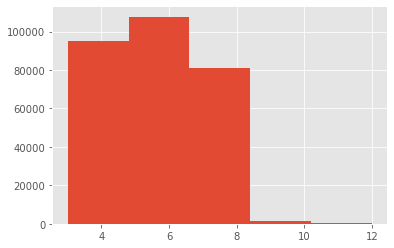

In [701]:
df_cylinders_unknown_check.hist(bins = 5)

# odometer

In [707]:
df_odometer = df_vehicles_unknown_check['odometer']
df_odometer 

0          32742.0
1          93600.0
2          87046.0
3         190000.0
4         116000.0
            ...   
458208     83790.0
458209     31888.0
458210     53000.0
458211    164000.0
458212    164000.0
Name: odometer, Length: 458213, dtype: float64

In [721]:
df_vehicles_unknown_check['drive'].unique()

array(['other', 'sedan', 'SUV', 'pickup', 'coupe', 'van', 'unknown',
       'truck', 'mini-van', 'wagon', 'convertible', 'hatchback', 'bus',
       'offroad'], dtype=object)

In [729]:
df_vehicles_unknown_check['paint_color'].value_counts()

unknown    140843
white       82786
black       64145
silver      46722
red         33274
blue        32746
grey        30455
custom       8843
green        7631
brown        6028
yellow       2002
orange       1970
purple        768
Name: paint_color, dtype: int64

<AxesSubplot:>

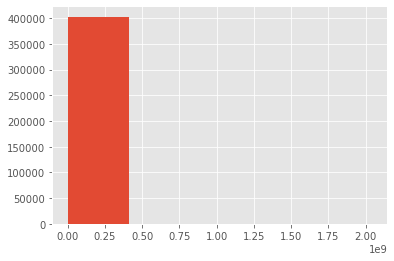

In [708]:
df_vehicles_unknown_check['odometer'].hist(bins = 5)

In [723]:
df_type_unknown = df_vehicles_unknown_check.loc[df_vehicles_unknown_check['type'] == 'unknown']
df_type_unknown

,url,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,description,state,year_url
13,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,2010.0,hyundai,tucson,unknown,unknown,gas,126000.0,clean,automatic,unknown,unknown,unknown,2010 Tucson AWD with 126k miles. Vehicle has ...,al,unknown
20,https://auburn.craigslist.org/cto/d/salem-lari...,auburn,2003.0,ford,f-150,unknown,unknown,gas,unknown,clean,automatic,unknown,unknown,unknown,221K MI GOOD LOOKING GOOD RUNNING SEE PIC THEN...,al,unknown
24,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,2016.0,honda,civic lx sedan 4d,like new,4 cylinders,gas,20580.0,clean,automatic,unknown,unknown,grey,"This Sedan was driven 4,116 miles/year, curren...",al,unknown
35,https://auburn.craigslist.org/ctd/d/sacramento...,auburn,2015.0,ford,transit connect cargo,excellent,unknown,gas,112974.0,clean,automatic,fwd,unknown,white,2015 *** Ford Transit Connect Cargo XLT 4dr LW...,al,unknown
44,https://auburn.craigslist.org/cto/d/alexander-...,auburn,1986.0,chevrolet,caprice,unknown,unknown,gas,unknown,clean,automatic,unknown,unknown,unknown,86 Chevy Caprice For sale. Can crank up an dri...,al,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458197,https://sheboygan.craigslist.org/ctd/d/sheboyg...,sheboygan,2016.0,ford,escape,unknown,unknown,gas,42560.0,clean,automatic,unknown,unknown,unknown,Dave Specht Motor Co. address: 295 N. Main ...,wi,unknown
458198,https://sheboygan.craigslist.org/ctd/d/random-...,sheboygan,1993.0,gmc,yukon,unknown,unknown,gas,0.0,clean,automatic,4wd,unknown,blue,Mueller's Sales & Service address: N7277 Hw...,wi,unknown
458205,https://wausau.craigslist.org/ctd/d/eau-claire...,wausau,2015.0,jeep,grand cherokee overland 4x4,unknown,unknown,gas,107907.0,clean,automatic,unknown,unknown,unknown,2015 Jeep Grand Cherokee Overland 4x4 ✔ We TA...,wi,unknown
458207,https://wausau.craigslist.org/ctd/d/eau-claire...,wausau,2017.0,audi,a4 premium plus quattro awd,unknown,unknown,gas,101270.0,clean,automatic,unknown,unknown,unknown,2017 Audi A4 Premium Plus Quattro AWD ✔ We TA...,wi,unknown


In [726]:
df_type_unknown['url'].loc[35]

'https://auburn.craigslist.org/ctd/d/sacramento-2015-ford-transit-connect/7233201268.html'

# Удаляем ненужное

In [82]:
df_vehicles = df_vehicles.drop('region_url', axis = 1)

In [85]:
final_price = df_vehicles ['price']
df_vehicles = df_vehicles.drop('price', axis = 1)

In [ ]:
df_vehicles_unknown_check

# Вытаскиваем год из ссылки

In [465]:
df_year_unknown = df_vehicles_unknown_check.loc[df_vehicles_unknown_check['year'] == 'unknown']
df_year_unknown

,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
15,https://auburn.craigslist.org/ctd/d/royal-palm...,auburn,https://auburn.craigslist.org,38500,unknown,unknown,500,unknown,8 cylinders,gas,...,rwd,unknown,pickup,white,https://images.craigslist.org/00Y0Y_65ISqDroMw...,2019 *Ram* *1500* Big Horn/Lone Star 4x2 Crew ...,al,26.703851,-80.081996,2020-11-25T11:52:03-0600
383,https://bham.craigslist.org/ctd/d/new-castle-2...,birmingham,https://bham.craigslist.org,14500,unknown,unknown,n Sentra,unknown,4 cylinders,gas,...,fwd,unknown,sedan,grey,https://images.craigslist.org/00d0d_4rIc0Iq9E4...,"2019 *Nissan* *Sentra* S CVT Sedan - $14,500Ca...",al,33.669601,-86.817617,2020-11-28T10:01:51-0600
469,https://bham.craigslist.org/ctd/d/vicksburg-20...,birmingham,https://bham.craigslist.org,41800,unknown,unknown,olet Silverado 2500HD,unknown,8 cylinders,diesel,...,4wd,unknown,pickup,white,https://images.craigslist.org/00b0b_jsyRZLmAUw...,2019 *Chevrolet* *Silverado 2500HD* CREW CAB 4...,al,32.332046,-90.857163,2020-11-26T19:10:40-0600
484,https://bham.craigslist.org/ctd/d/new-castle-2...,birmingham,https://bham.craigslist.org,18700,unknown,unknown,Compass,unknown,4 cylinders,gas,...,fwd,unknown,SUV,red,https://images.craigslist.org/00q0q_8PVU7cjYgf...,"2018 *Jeep* *Compass* Latitude FWD SUV - $18,7...",al,33.669601,-86.817617,2020-11-26T10:12:22-0600
849,https://bham.craigslist.org/ctd/d/new-castle-2...,birmingham,https://bham.craigslist.org,28900,unknown,unknown,a Highlander,unknown,6 cylinders,gas,...,fwd,unknown,SUV,white,https://images.craigslist.org/00S0S_iAz66PJkfz...,2018 *Toyota* *Highlander* XLE V6 FWD SUV - $2...,al,33.669601,-86.817617,2020-11-22T04:40:36-0600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457714,https://seattle.craigslist.org/see/ctd/d/tacom...,seattle-tacoma,https://seattle.craigslist.org,32888,unknown,unknown,F-150,unknown,6 cylinders,gas,...,4wd,unknown,pickup,red,https://images.craigslist.org/00202_aA33mB7OL5...,"2018 *Ford* *F-150* XLT Truck - $32,888Call Us...",wa,47.23952,-122.377794,2020-12-03T07:13:12-0800
457761,https://seattle.craigslist.org/see/ctd/d/seatt...,seattle-tacoma,https://seattle.craigslist.org,39840,unknown,unknown,Grand Cherokee,unknown,8 cylinders,gas,...,4wd,unknown,SUV,black,https://images.craigslist.org/00I0I_POpRNvjwph...,2018 *Jeep* *Grand Cherokee* Summit 4x4 SUV - ...,wa,47.555298,-122.334807,2020-12-03T05:30:28-0800
457866,https://wenatchee.craigslist.org/ctd/d/wenatch...,wenatchee,https://wenatchee.craigslist.org,40880,unknown,unknown,olet Silverado 1500,unknown,8 cylinders,gas,...,4wd,unknown,pickup,silver,https://images.craigslist.org/00f0f_3leFA63Fg3...,2020 *Chevrolet* *Silverado 1500* 4WD Double C...,wa,47.434493,-120.320759,2020-12-03T08:00:56-0800
457867,https://wenatchee.craigslist.org/ctd/d/wenatch...,wenatchee,https://wenatchee.craigslist.org,27880,unknown,unknown,des-Benz GLA,unknown,4 cylinders,gas,...,fwd,unknown,SUV,white,https://images.craigslist.org/01111_8wRyMsZmC5...,"2019 *Mercedes-Benz* *GLA* GLA 250 SUV - $27,8...",wa,47.434493,-120.320759,2020-12-03T07:51:01-0800


In [148]:
df_year_unknown['url'].loc[849]

'https://bham.craigslist.org/ctd/d/new-castle-2018-toyota-highlander-xle/7235124536.html'

In [149]:
df_year_unknown['url'].loc[469]

'https://bham.craigslist.org/ctd/d/vicksburg-2019-chevrolet-silverado/7237486859.html'

In [150]:
df_year_unknown['url'].loc[457761]

'https://seattle.craigslist.org/see/ctd/d/seattle-2018-jeep-grand-cherokee-summit/7240919313.html'

In [155]:
pip install nums_from_string

Note: you may need to restart the kernel to use updated packages.


In [160]:
import nums_from_string

In [290]:
#df_url = df_year_unknown['url']
#df_url

15        https://auburn.craigslist.org/ctd/d/royal-palm...
383       https://bham.craigslist.org/ctd/d/new-castle-2...
469       https://bham.craigslist.org/ctd/d/vicksburg-20...
484       https://bham.craigslist.org/ctd/d/new-castle-2...
849       https://bham.craigslist.org/ctd/d/new-castle-2...
                                ...                        
457714    https://seattle.craigslist.org/see/ctd/d/tacom...
457761    https://seattle.craigslist.org/see/ctd/d/seatt...
457866    https://wenatchee.craigslist.org/ctd/d/wenatch...
457867    https://wenatchee.craigslist.org/ctd/d/wenatch...
457871    https://wenatchee.craigslist.org/ctd/d/wenatch...
Name: url, Length: 1050, dtype: object

In [455]:
#df_url = df_year_unknown['url'].apply(lambda x: x[8:].split('/')[3])
#df_url

15        royal-palm-beach-2019-ram-1500-big-horn
383         new-castle-2019-nissan-sentra-cvt-gun
469            vicksburg-2019-chevrolet-silverado
484         new-castle-2018-jeep-compass-latitude
849         new-castle-2018-toyota-highlander-xle
                           ...                   
457714                                          d
457761                                          d
457866      wenatchee-2020-chevrolet-silverado-wd
457867       wenatchee-2019-mercedes-benz-gla-gla
457871    wenatchee-2020-ram-1500-classic-slt-4x4
Name: url, Length: 1050, dtype: object

In [460]:
#df_url2 = df_url.str.split('-', 4)
#df_url2

Вытаскиваем год из ссылки

In [469]:
df_year_unknown ['year_url'] = df_year_unknown['url'].str.findall("[0-9]+").apply(lambda x: x[0])
df_year_unknown ['year_url']

/var/folders/q4/p89x159x6hs05djns8vkm4600000gn/T/ipykernel_11080/332313161.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_unknown ['year_url'] = df_year_unknown['url'].str.findall("[0-9]+").apply(lambda x: x[0])


15        2019
383       2019
469       2019
484       2018
849       2018
          ... 
457714    2018
457761    2018
457866    2020
457867    2019
457871    2020
Name: year_url, Length: 1050, dtype: object

In [470]:
df_year_unknown 

,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,...,size,type,paint_color,image_url,description,state,lat,long,posting_date,year_url
15,https://auburn.craigslist.org/ctd/d/royal-palm...,auburn,https://auburn.craigslist.org,38500,unknown,unknown,500,unknown,8 cylinders,gas,...,unknown,pickup,white,https://images.craigslist.org/00Y0Y_65ISqDroMw...,2019 *Ram* *1500* Big Horn/Lone Star 4x2 Crew ...,al,26.703851,-80.081996,2020-11-25T11:52:03-0600,2019
383,https://bham.craigslist.org/ctd/d/new-castle-2...,birmingham,https://bham.craigslist.org,14500,unknown,unknown,n Sentra,unknown,4 cylinders,gas,...,unknown,sedan,grey,https://images.craigslist.org/00d0d_4rIc0Iq9E4...,"2019 *Nissan* *Sentra* S CVT Sedan - $14,500Ca...",al,33.669601,-86.817617,2020-11-28T10:01:51-0600,2019
469,https://bham.craigslist.org/ctd/d/vicksburg-20...,birmingham,https://bham.craigslist.org,41800,unknown,unknown,olet Silverado 2500HD,unknown,8 cylinders,diesel,...,unknown,pickup,white,https://images.craigslist.org/00b0b_jsyRZLmAUw...,2019 *Chevrolet* *Silverado 2500HD* CREW CAB 4...,al,32.332046,-90.857163,2020-11-26T19:10:40-0600,2019
484,https://bham.craigslist.org/ctd/d/new-castle-2...,birmingham,https://bham.craigslist.org,18700,unknown,unknown,Compass,unknown,4 cylinders,gas,...,unknown,SUV,red,https://images.craigslist.org/00q0q_8PVU7cjYgf...,"2018 *Jeep* *Compass* Latitude FWD SUV - $18,7...",al,33.669601,-86.817617,2020-11-26T10:12:22-0600,2018
849,https://bham.craigslist.org/ctd/d/new-castle-2...,birmingham,https://bham.craigslist.org,28900,unknown,unknown,a Highlander,unknown,6 cylinders,gas,...,unknown,SUV,white,https://images.craigslist.org/00S0S_iAz66PJkfz...,2018 *Toyota* *Highlander* XLE V6 FWD SUV - $2...,al,33.669601,-86.817617,2020-11-22T04:40:36-0600,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457714,https://seattle.craigslist.org/see/ctd/d/tacom...,seattle-tacoma,https://seattle.craigslist.org,32888,unknown,unknown,F-150,unknown,6 cylinders,gas,...,unknown,pickup,red,https://images.craigslist.org/00202_aA33mB7OL5...,"2018 *Ford* *F-150* XLT Truck - $32,888Call Us...",wa,47.23952,-122.377794,2020-12-03T07:13:12-0800,2018
457761,https://seattle.craigslist.org/see/ctd/d/seatt...,seattle-tacoma,https://seattle.craigslist.org,39840,unknown,unknown,Grand Cherokee,unknown,8 cylinders,gas,...,unknown,SUV,black,https://images.craigslist.org/00I0I_POpRNvjwph...,2018 *Jeep* *Grand Cherokee* Summit 4x4 SUV - ...,wa,47.555298,-122.334807,2020-12-03T05:30:28-0800,2018
457866,https://wenatchee.craigslist.org/ctd/d/wenatch...,wenatchee,https://wenatchee.craigslist.org,40880,unknown,unknown,olet Silverado 1500,unknown,8 cylinders,gas,...,unknown,pickup,silver,https://images.craigslist.org/00f0f_3leFA63Fg3...,2020 *Chevrolet* *Silverado 1500* 4WD Double C...,wa,47.434493,-120.320759,2020-12-03T08:00:56-0800,2020
457867,https://wenatchee.craigslist.org/ctd/d/wenatch...,wenatchee,https://wenatchee.craigslist.org,27880,unknown,unknown,des-Benz GLA,unknown,4 cylinders,gas,...,unknown,SUV,white,https://images.craigslist.org/01111_8wRyMsZmC5...,"2019 *Mercedes-Benz* *GLA* GLA 250 SUV - $27,8...",wa,47.434493,-120.320759,2020-12-03T07:51:01-0800,2019


In [463]:
df_url2.to_csv('filename.csv', sep = ',')

In [394]:
df_url2 = df_url2.pop(0:1)
df_url2 

SyntaxError: invalid syntax (747798935.py, line 1)

In [241]:
df_url = df_year_unknown['url'].apply(lambda x: x[8:].split('-')[2])
df_url.unique()

array(['beach', '2019', 'chevrolet', '2018', 'ford', '2020', 'nissan',
       'jeep', 'volkswagen', 'toyota', 'gmc', 'subaru', 'audi',
       'mercedes', 'ram', 'city', 'honda', 'dodge', 'hyundai', 'volvo',
       'chrysler', 'kia', 'bmw', 'land', '2005', 'mini', 'alfa', 'jaguar',
       'pro', 'mazda', 'tesla', 'buick', 'acura', 'buy', 'brand', '2002',
       'cruze', '2021', '2000/7221952215.html', 'zero', 'two', 'suzuki',
       'tesla/7239245130.html', 'freightliner', '2011', '2017', '2013',
       '2012', '01', 'mgb', 'lexus'], dtype=object)

In [242]:
df_url

15            beach
383            2019
469       chevrolet
484            2018
849            2018
            ...    
457714         ford
457761         jeep
457866    chevrolet
457867     mercedes
457871          ram
Name: url, Length: 1050, dtype: object

In [209]:
nmp_url=df_url.iloc[15]

'https://bham.craigslist.org/ctd/d/vicksburg-2018-chevrolet-silverado-1500/7228244510.html'

In [210]:
nmp_url = str(nmp_url).split ("/",6)[5]
nmp_url

'vicksburg-2018-chevrolet-silverado-1500'

In [152]:
df_vehicles = df_vehicles.drop('lat', axis = 1)
df_vehicles = df_vehicles.drop('long', axis = 1)

KeyError: "['lat'] not found in axis"

In [126]:
df_vehicles = df_vehicles.drop('posting_date', axis = 1)

In [129]:
df_vehicles = df_vehicles.drop('image_url', axis = 1)

In [136]:
df_vehicles = df_vehicles.drop('VIN', axis = 1)

In [140]:
df_vehicles = df_vehicles.drop('size', axis = 1)

In [141]:
df_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458213 entries, 0 to 458212
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   url           458213 non-null  object 
 1   region        458213 non-null  object 
 2   year          457163 non-null  float64
 3   manufacturer  439993 non-null  object 
 4   model         453367 non-null  object 
 5   condition     265273 non-null  object 
 6   cylinders     287073 non-null  object 
 7   fuel          454976 non-null  object 
 8   odometer      402910 non-null  float64
 9   title_status  455636 non-null  object 
 10  transmission  455771 non-null  object 
 11  drive         324025 non-null  object 
 12  type          345475 non-null  object 
 13  paint_color   317370 non-null  object 
 14  description   458143 non-null  object 
 15  state         458213 non-null  object 
dtypes: float64(2), object(14)
memory usage: 55.9+ MB


In [144]:
df_vehicles['title_status'].unique()

array(['clean', 'lien', 'missing', 'salvage', 'rebuilt', nan,
       'parts only'], dtype=object)

In [145]:
df_vehicles_unknown_check['title_status'].value_counts()

clean         439626
rebuilt         8698
salvage         4233
unknown         2577
lien            2091
missing          794
parts only       194
Name: title_status, dtype: int64

In [146]:
df_vehicles_unknown_check['condition'].value_counts()

unknown      192940
good         115685
excellent    115206
like new      24553
fair           7740
new            1428
salvage         661
Name: condition, dtype: int64

In [147]:
df_odometer_unknown = df_vehicles_unknown_check.loc[df_vehicles_unknown_check['odometer'] == 'unknown']
df_odometer_unknown

,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
20,https://auburn.craigslist.org/cto/d/salem-lari...,auburn,https://auburn.craigslist.org,4500,2003.0,ford,f-150,unknown,unknown,gas,...,unknown,unknown,unknown,unknown,https://images.craigslist.org/00606_bW4SoRpyFr...,221K MI GOOD LOOKING GOOD RUNNING SEE PIC THEN...,al,32.6212,-85.184,2020-11-23T14:58:22-0600
44,https://auburn.craigslist.org/cto/d/alexander-...,auburn,https://auburn.craigslist.org,2200,1986.0,chevrolet,caprice,unknown,unknown,gas,...,unknown,unknown,unknown,unknown,https://images.craigslist.org/00d0d_9Jxy2NCeqp...,86 Chevy Caprice For sale. Can crank up an dri...,al,32.940606,-85.958746,2020-11-16T10:17:17-0600
64,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,34972,2019.0,infiniti,q60 3.0t premium coupe,like new,unknown,gas,...,unknown,unknown,unknown,unknown,https://images.craigslist.org/00h0h_gfhtCJQjje...,GET PAYMENTS AS LOW AS $475 A MONTH WITH ZERO ...,al,32.592,-85.5189,2020-11-10T00:05:46-0600
69,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,1000,2008.0,chevrolet,hhr lt,fair,unknown,gas,...,unknown,unknown,SUV,unknown,https://images.craigslist.org/01111_hCVxsGjZtO...,High mileage (highway only) Needs a heater cor...,al,32.5475,-85.4682,2020-11-07T10:02:34-0600
218,https://bham.craigslist.org/cto/d/trussville-2...,birmingham,https://bham.craigslist.org,4500,2006.0,honda,pilot,unknown,unknown,gas,...,unknown,unknown,unknown,unknown,https://images.craigslist.org/00Y0Y_9kbBfYrht2...,"2006 Honda Pilot, 4 Michelin tires, 2 key fobs...",al,33.649773,-86.610105,2020-11-30T17:33:34-0600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457692,https://seattle.craigslist.org/tac/ctd/d/tacom...,seattle-tacoma,https://seattle.craigslist.org,0,2017.0,acura,mdx w/technology pkg,unknown,6 cylinders,gas,...,4wd,unknown,SUV,unknown,https://images.craigslist.org/00e0e_3gV9emnk0y...,HINSHAW'S ACURA STOCK #: 17594G ...,wa,47.240046,-122.350066,2020-12-03T07:37:13-0800
457707,https://seattle.craigslist.org/tac/ctd/d/tacom...,seattle-tacoma,https://seattle.craigslist.org,0,2017.0,acura,mdx,unknown,6 cylinders,gas,...,4wd,unknown,SUV,unknown,https://images.craigslist.org/00O0O_2hQ7JqgX66...,HINSHAW'S ACURA STOCK #: 17591M ...,wa,47.240046,-122.350066,2020-12-03T07:19:41-0800
457723,https://seattle.craigslist.org/tac/ctd/d/tacom...,seattle-tacoma,https://seattle.craigslist.org,0,2015.0,chevrolet,malibu lt,unknown,4 cylinders,gas,...,fwd,unknown,sedan,unknown,https://images.craigslist.org/00Z0Z_gxzO6dTd4L...,HINSHAW'S ACURA STOCK #: 200776AK ...,wa,47.240046,-122.350066,2020-12-03T07:02:08-0800
457724,https://seattle.craigslist.org/skc/ctd/d/aubur...,seattle-tacoma,https://seattle.craigslist.org,0,2015.0,honda,accord sedan sport,unknown,4 cylinders,gas,...,fwd,unknown,sedan,unknown,https://images.craigslist.org/00y0y_h344YjCwYN...,HINSHAW'S HONDA STOCK #: 210069A ...,wa,47.33029,-122.222553,2020-12-03T07:00:29-0800
